<div style="text-align:center;">
  <strong><h1 style="font-size:2em;">Data analysis of job offers extracted from Linkedin by webscraping</h1></strong>
</div>

In [67]:
import pandas as pd
import sqlite3

In [68]:
# Convert the job offers from the SQLite DB to a pandas dataframe

db_file='../job_offers_data_analytics.db'

# Establish a connection to the SQLite database
connection = sqlite3.connect(db_file)  # Replace with your actual database connection details
cursor = connection.cursor()

cursor.execute("SELECT * FROM job_offers")  # Replace 'your_table' with the actual table name

# Fetch all the rows from the result set
rows = cursor.fetchall()

# Get the column names from the cursor description
column_names = [description[0] for description in cursor.description]

df = pd.DataFrame(rows, columns=column_names)
df

,Title,Company,Location,Description
0,Online Data Analyst,TELUS International,"Gerona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...
1,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)",We are hiring freelance Spanish ...
2,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...
4,"Data Analyst (Bangkok Based, relocation provided)",Agoda,"Barcelona, Cataluña, España",About AgodaAgoda is an online tr...
...,...,...,...,...
116,Senior Marketing Data Analyst,Madbox,"Barcelona, Cataluña, España (Híbrido)",Madbox is a mobile gaming compan...
117,Consultor Business Intelligence,Consulsap,"Barcelona, Cataluña, España",Este anuncio proviene d...
118,Analista de datos,Voiping US,España (En remoto),¡En Voiping US seleccionamos Tal...
119,Data Analyst Bootcamp and Project Work (remote...,Moyyn,España (En remoto),"If you are a student, a recent g..."


In [64]:
# As an alternative, load the dataset from the text file

import pandas as pd

filename = 'job_offers_data_analytics.txt'

df = pd.read_csv(filename, header=None, sep='\t', names = ['Title','Company', 'Location', 'Description'])
df

,Title,Company,Location,Description
0,Online Data Analyst,TELUS International,"Gerona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...
1,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)",We are hiring freelance Spanish ...
2,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...
4,"Data Analyst (Bangkok Based, relocation provided)",Agoda,"Barcelona, Cataluña, España",About AgodaAgoda is an online tr...
...,...,...,...,...
116,Senior Marketing Data Analyst,Madbox,"Barcelona, Cataluña, España (Híbrido)",Madbox is a mobile gaming compan...
117,Consultor Business Intelligence,Consulsap,"Barcelona, Cataluña, España",Este anuncio proviene d...
118,Analista de datos,Voiping US,España (En remoto),¡En Voiping US seleccionamos Tal...
119,Data Analyst Bootcamp and Project Work (remote...,Moyyn,España (En remoto),"If you are a student, a recent g..."


### Companies that have published more than one job offer

In [69]:
# Companies that have published more than one job offer

df['Company'].value_counts()[df['Company'].value_counts()>1]  # Compañias que han publicado más de 1 oferta

Glovo                                    11
Capgemini                                 3
Capgemini Engineering                     3
eDreams ODIGEO                            3
Agoda                                     3
Criteo                                    3
TELUS International AI Data Solutions     3
Forcadell                                 3
knowmad mood                              3
Rhams Talent                              3
Garaje de ideas                           3
Bluetab, an IBM Company                   3
TecAlliance                               2
HR NET CONSULTING                         2
TELUS International                       2
Leadtech Group                            2
Michael Page                              2
GOOSE Recruitment                         2
EsadeGov                                  2
Deel                                      2
Allianz Technology                        2
HelloMrLead                               2
Moyyn                           

### Find similarity between job offers by a given company

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df_company = df[df['Company'] == 'Glovo']

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply the vectorizer to the 'Description' column
tfidf_matrix = vectorizer.fit_transform(df_company['Description'])

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert the similarity matrix to a DataFrame for better visualization
similarity_df = pd.DataFrame(similarity_matrix, columns=df_company.index, index=df_company.index)


similarity_df

,1,8,26,49,66,70,71,81,88,92,93
1,1.000000,0.437863,0.445272,0.443322,0.453114,0.462789,0.453352,0.432805,0.450525,0.443322,0.451185
8,0.437863,1.000000,0.890677,0.891784,0.889318,0.889556,0.893467,0.860882,0.899004,0.891784,0.871029
26,0.445272,0.890677,1.000000,0.975289,0.936279,0.892400,0.961395,0.857914,0.940764,0.975289,0.875600
49,0.443322,0.891784,0.975289,1.000000,0.941950,0.895927,0.964791,0.847246,0.945953,1.000000,0.879133
66,0.453114,0.889318,0.936279,0.941950,1.000000,0.893328,0.942869,0.844551,0.977084,0.941950,0.871155
70,0.462789,0.889556,0.892400,0.895927,0.893328,1.000000,0.905908,0.849180,0.901421,0.895927,0.861097
71,0.453352,0.893467,0.961395,0.964791,0.942869,0.905908,1.000000,0.853781,0.947345,0.964791,0.867394
81,0.432805,0.860882,0.857914,0.847246,0.844551,0.849180,0.853781,1.000000,0.854905,0.847246,0.838066
88,0.450525,0.899004,0.940764,0.945953,0.977084,0.901421,0.947345,0.854905,1.000000,0.945953,0.876817
92,0.443322,0.891784,0.975289,1.000000,0.941950,0.895927,0.964791,0.847246,0.945953,1.000000,0.879133


In [14]:
# Display only nondiagonal values larger than 0.8

import numpy as np
mask = (similarity_df.values < 0.8) | np.eye(len(similarity_df), dtype=bool)
result_df = similarity_df.mask(mask, '')
result_df

,1,8,26,49,66,70,71,81,88,92,93
1,,,,,,,,,,,
8,,,0.890677,0.891784,0.889318,0.889556,0.893467,0.860882,0.899004,0.891784,0.871029
26,,0.890677,,0.975289,0.936279,0.8924,0.961395,0.857914,0.940764,0.975289,0.8756
49,,0.891784,0.975289,,0.94195,0.895927,0.964791,0.847246,0.945953,1.0,0.879133
66,,0.889318,0.936279,0.94195,,0.893328,0.942869,0.844551,0.977084,0.94195,0.871155
70,,0.889556,0.8924,0.895927,0.893328,,0.905908,0.84918,0.901421,0.895927,0.861097
71,,0.893467,0.961395,0.964791,0.942869,0.905908,,0.853781,0.947345,0.964791,0.867394
81,,0.860882,0.857914,0.847246,0.844551,0.84918,0.853781,,0.854905,0.847246,0.838066
88,,0.899004,0.940764,0.945953,0.977084,0.901421,0.947345,0.854905,,0.945953,0.876817
92,,0.891784,0.975289,1.0,0.94195,0.895927,0.964791,0.847246,0.945953,,0.879133


In [ ]:
df.iloc[26]['Description']

In [ ]:
df.iloc[92]['Description']

### Find common datascience terms in the job ooffers

In [72]:
import re
import pandas as pd

# List of terms
term_list = ['Excel', 'Google Sheets', 'Python', 'Pyspark', 'Pandas', 'Matplotlib', 'Spark', 'Ray', 'AWS', 'GCP', 'Google Cloud', 'Azure',
             'Redshift', 'Snowflake', 'Tensorflow', 'Pytorch', 'JAX', 'SQL', 'Git', 'Github', 'Kubeflow', 'Airflow',
             'Flink', 'Kibana', 'Tableau', 'Transformers', 'SpaCy', 'NLTK', 'RAG', 'Looker Studio', 'Power BI', 'Redshift',
             'Snowflake', 'Docker', 'Azkaban', 'Docker', 'Kubernetes', 'DAX', 'Visual Basic', 'Scala', 'SAS', 'Qlik Sense', 'Qlik View',
             'QlikSense', 'QlikView', 'Quicksight', 'Microstrategy', 'Adobe Analytics', 'Google Analytics', 'dbt', 'Matlab', 
             'Periscope', 'Amplitude', 'ContentSquare', 'Bloomreach', 'Databricks', 'Jupyter', 'iPython', 'HubSpot', 'Salesforce',
             'Marketo', 'Dreamdata', 'Snowflake', 'BigQuery'
]

# Create a regex pattern for matching terms
pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, term_list)) + r')\b', flags=re.IGNORECASE)

# Function to find matching terms in a text
def find_matching_terms(text):
    if isinstance(text, str):  # Check if the value is a valid string
        matching_terms = pattern.findall(text)
        return ', '.join(matching_terms)
    else:
        return ''  # Return an empty string for NaN values

# Create a new column with matching terms
df['Terms'] = df['Description'].apply(find_matching_terms)

df.head(50)


,Title,Company,Location,Description,Terms
0,Online Data Analyst,TELUS International,"Gerona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...,
1,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)",We are hiring freelance Spanish ...,
2,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...,"SQL, BigQuery, Tableau"
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,"SQL, SQL, Microstrategy, Tableau"
4,"Data Analyst (Bangkok Based, relocation provided)",Agoda,"Barcelona, Cataluña, España",About AgodaAgoda is an online tr...,"SAS, Python, SQL, SQL, python, tableau, sql, p..."
5,Data Analyst,Criteo,"Barcelona, Cataluña, España (Híbrido)",What You'll Do:Analytics at Crit...,"Tableau, Git, Python, SQL, Python, Tableau"
6,Data Analyst Bootcamp and Project Work (remote...,Moyyn,España (En remoto),"If you are a student, a recent g...",Python
7,Online Data Analyst - Spain,TELUS International AI Data Solutions,España (En remoto),Description and RequirementsTELU...,
8,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)","If you’re here, it’s because you...",SQL
9,Commercial BI Analyst,Veriff,"Barcelona, Cataluña, España (Híbrido)",We want to build the future of i...,"SQL, Python, dbt"


### Find job offers with no common terms

In [81]:
df[df['Terms'] == '']

,Title,Company,Location,Description,Terms
0,Online Data Analyst,TELUS International,"Gerona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...,
1,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)",We are hiring freelance Spanish ...,
7,Online Data Analyst - Spain,TELUS International AI Data Solutions,España (En remoto),Description and RequirementsTELU...,
39,Online Data Analyst,TELUS International,"Barcelona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...,
44,WORK FROM HOME - Online Data Analyst,TELUS International AI Data Solutions,España (En remoto),Why USTELUS International AI-Dat...,
51,Spanish Speaker - Online Data Analyst,TELUS International AI Data Solutions,España (En remoto),Why USTELUS International AI-Dat...,
64,Prácticas de Analista de datos (remoto),HelloMrLead,"Barcelona, Cataluña, España (En remoto)","Con esta oferta, de Prácticas de...",
72,DATA ANALYST - RETENTION,MCR International | Executive Search,"Barcelona, Cataluña, España (Presencial)",Descripción Del Trabajo / Job De...,
78,Analista de datos (prácticas en remoto),HelloMrLead,España (En remoto),Con esta oferta de prácticas de ...,
82,Consultor BI,FRG Technology Consulting,"Barcelona, Cataluña, España",Actualmente seleccionamos un per...,


In [ ]:
df.iloc[25]['Description']

### Most used datascience tools

In [80]:
# Function to count the occurrences of each term in the "Terms" column
def count_term_occurrences(terms, term_column):
    term_counts = {term: term_column.str.contains(re.escape(term), case=False).sum() for term in terms}
    return term_counts

# Count occurrences of each term in the "Terms" column
term_counts = count_term_occurrences(term_list, df['Terms'])

# Sort terms by the number of occurrences in descending order
sorted_terms = sorted(term_counts.items(), key=lambda x: x[1], reverse=True)

# Display the sorted terms and their counts
for term, count in sorted_terms:
    if count:
        print(f'{term}: {count}')

SQL: 73
Python: 57
Power BI: 38
Tableau: 29
Excel: 25
DAX: 15
SAS: 15
AWS: 9
Google Analytics: 7
BigQuery: 7
Azure: 6
Git: 6
QlikView: 6
Pandas: 5
Redshift: 5
Amplitude: 5
Google Cloud: 4
Snowflake: 4
Microstrategy: 4
dbt: 4
Jupyter: 4
iPython: 4
Qlik Sense: 3
Adobe Analytics: 3
Salesforce: 3
Google Sheets: 2
Spark: 1
GCP: 1
Github: 1
Looker Studio: 1
Qlik View: 1
QlikSense: 1
Quicksight: 1
Matlab: 1
Periscope: 1
ContentSquare: 1
Bloomreach: 1
Databricks: 1
HubSpot: 1


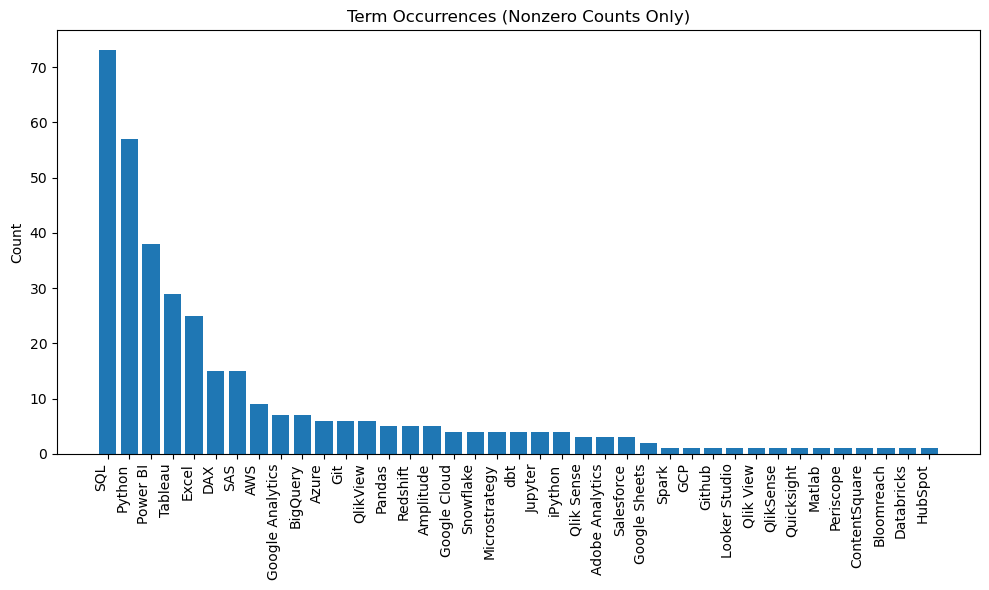

In [79]:
import matplotlib.pyplot as plt

# Function to count occurrences of each term in the "Terms" column
def count_term_occurrences(terms, term_column):
    term_counts = {term: term_column.str.contains(re.escape(term), case=False).sum() for term in terms}
    return term_counts

# Count occurrences of each term in the "Terms" column
term_counts = count_term_occurrences(term_list, df['Terms'])

# Filter out terms with zero counts
nonzero_terms = {term: count for term, count in term_counts.items() if count > 0}

# Sort terms by the number of occurrences in descending order
sorted_terms = sorted(nonzero_terms.items(), key=lambda x: x[1], reverse=True)

# Plot a histogram of term occurrences
plt.figure(figsize=(10, 6))
plt.bar([term[0] for term in sorted_terms], [term[1] for term in sorted_terms])
plt.ylabel('Count')
plt.title('Term Occurrences (Nonzero Counts Only)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



In [ ]:
df.iloc[12]['Description']

### Find how many job offers imply hybrid, remote or in-person work

In [82]:
df['Regime'] = df['Location'].str.extract(r'\((.*?)\)')
df['Regime'] = df['Regime'].fillna('Unspecified')
df

,Title,Company,Location,Description,Terms,Regime
0,Online Data Analyst,TELUS International,"Gerona, Cataluña, España (En remoto)",We are hiring freelance Spanish ...,,En remoto
1,Junior Operations Data Analyst (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)",We are hiring freelance Spanish ...,,Híbrido
2,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...,"SQL, BigQuery, Tableau",Híbrido
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,"SQL, SQL, Microstrategy, Tableau",Híbrido
4,"Data Analyst (Bangkok Based, relocation provided)",Agoda,"Barcelona, Cataluña, España",About AgodaAgoda is an online tr...,"SAS, Python, SQL, SQL, python, tableau, sql, p...",Unspecified
...,...,...,...,...,...,...
116,Senior Marketing Data Analyst,Madbox,"Barcelona, Cataluña, España (Híbrido)",Madbox is a mobile gaming compan...,SQL,Híbrido
117,Consultor Business Intelligence,Consulsap,"Barcelona, Cataluña, España",Este anuncio proviene d...,"sql, QlikSense, Qlikview",Unspecified
118,Analista de datos,Voiping US,España (En remoto),¡En Voiping US seleccionamos Tal...,,En remoto
119,Data Analyst Bootcamp and Project Work (remote...,Moyyn,España (En remoto),"If you are a student, a recent g...",Python,En remoto


In [83]:
df['Regime'].value_counts()

Híbrido        49
En remoto      41
Presencial     21
Unspecified    10
Name: Regime, dtype: int64

In [84]:
# Calculate percentage values

N_offers = df['Title'].count()

N_hibrido = df[df['Regime']=='Híbrido']['Regime'].count()
N_hibrido = round(N_hibrid*100/N_offers, 1)
            
N_remoto = df[df['Regime']=='En remoto']['Regime'].count()
N_remoto = round(N_remoto*100/N_offers, 1)  
            
N_presencial = df[df['Regime']=='Presencial']['Regime'].count()
N_presencial = round(N_presencial*100/N_offers, 1) 
            
N_unspecified = round((100 -N_hibrid -N_remoto - N_presencial), 1)

print(N_hibrido, " % hybrid")
print(N_remoto, " % remote")
print(N_presencial, " % in-person")
print(N_unspecified, " % unspecified")

33.5  % hybrid
33.9  % remote
17.4  % in-person
8.2  % unspecified


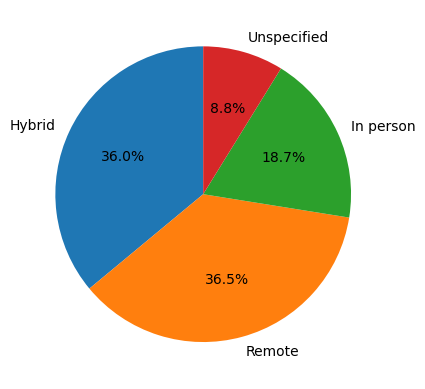

In [85]:
# Create a pie chart

labels = ['Hybrid', 'Remote', 'In person', 'Unspecified']
sizes = [N_hibrido, N_remoto, N_presencial, N_unspecified]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

### Find years of experience required

In [86]:
import re
pattern = r'(\d+)\s*(-?\s*\d*)\s*(años de experiencia|years of experience)'
# Use re.findall to find matches directly
df['Experience'] = df['Description'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else '')
df['Experience'] = df['Experience'].apply(lambda x: ' '.join(x).replace(',', '') if x else '')

df_filtered = df[df['Experience'] != '']  # Filter rows with non-empty 'Experience' values
df_filtered

,Title,Company,Location,Description,Terms,Regime,Experience
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,"SQL, SQL, Microstrategy, Tableau",Híbrido,4 años de experiencia
10,Data Analyst (AWS),knowmad mood,Barcelona y alrededores (En remoto),"¡Somos knowmad mood, anteriormen...","SQL, AWS, Snowflake, AWS",En remoto,3 años de experiencia
13,Data Analyst,Garaje de ideas,Barcelona y alrededores (Híbrido),Lo que buscamos es…Un/a Data Ana...,"SQL, DBT, Google Cloud, Tableau, BigQuery, DBT...",Híbrido,5 años de experiencia
18,BI Data Analyst,eDreams ODIGEO,"Barcelona, Cataluña, España (Híbrido)",eDreams ODIGEO is one of the wor...,"BigQuery, Microstrategy, Python, Google Cloud,...",Híbrido,3 years of experience
19,BI Data Analyst,eDreams ODIGEO,"Barcelona, Cataluña, España (Híbrido)",eDreams ODIGEO is one of the wor...,"BigQuery, Microstrategy, Python, Google Cloud,...",Híbrido,3 years of experience
34,Digital Data Analyst,Garaje de ideas,España (En remoto),Lo que buscamos es…Un/a Digital ...,"Google Analytics, Google Analytics, BigQuery, ...",En remoto,5 años de experiencia
36,Data Analyst Power BI,Capgemini Engineering,"Barcelona, Cataluña, España (Híbrido)",¡Hola! Somos CAPGEMINITenemos la...,"Power BI, DAX, Python, Power BI",Híbrido,3 años de experiencia
37,Data Analyst Power BI,Capgemini Engineering,"Barcelona, Cataluña, España (Híbrido)",¡Hola! Somos CAPGEMINITenemos la...,"Power BI, DAX, Python, Power BI",Híbrido,3 años de experiencia
38,Data Analyst Power BI,Capgemini Engineering,"Barcelona, Cataluña, España (Híbrido)",¡Hola! Somos CAPGEMINITenemos la...,"Power BI, DAX, Python, Power BI",Híbrido,3 años de experiencia
42,Data Analyst,DDB Spain,"Barcelona, Cataluña, España (Híbrido)",Para nuestra oficina de DDB Barc...,"Excel, Adobe Analytics, Power BI",Híbrido,2 -3 años de experiencia


In [87]:
# Store the dataframe into a new SQLite table

db_file='../job_offers_data_analytics.db'
conn = sqlite3.connect(db_file)
df.to_sql(name='job_offers-analysis', con=conn, index=False, if_exists='replace')
conn.close()


In [62]:
df.iloc[97]['Description']

'              OGNEXT es una consultora IT con más de 15 años de experiencia. Nos caracteriza nuestra cercanía, nuestro espíritu de equipo y el interés continuo por el desarrollo y crecimiento de todos los que componemos el #equipolognext.Contamos con la confianza de los mejores clientes para proporcionar profesionales altamente calificados que vehiculizan la innovación en los mejores proyectos. Formarás parte de proyectos retadores e internacionales, estarás trabajando con equipos multidisciplinares y multiculturales.Estamos buscamos a un Consultor BI Junior para incorporar en uno de nuestros mas importantes clientes.¿Cuáles serán tus principales funciones?: Gestión de peticiones de servicio en Remedy y Jira. Implica asignación a su dueño.Ejecución de los workorders asignados a el/ella.Gestión de incidencias con triaje previo o desvío al responsable del dominio.Resolución de incidencias no complejas.Documentación de resolución de incidencias.Seguimiento de incidencias y workorders en 

### Find salary

In [91]:
import re
# Define a regular expression pattern for the desired text patterns
pattern = r'(\d[\d,\.]*)\s*(EUR|€|eur|euros|K)' 

# Use re.findall to find matches directly
df['Salary'] = df['Description'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered = df.dropna(subset=['Salary'])
df_filtered

,Title,Company,Location,Description,Terms,Regime,Experience,Salary
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,"SQL, SQL, Microstrategy, Tableau",Híbrido,4 años de experiencia,"(30.000, €)"
13,Data Analyst,Garaje de ideas,Barcelona y alrededores (Híbrido),Lo que buscamos es…Un/a Data Ana...,"SQL, DBT, Google Cloud, Tableau, BigQuery, DBT...",Híbrido,5 años de experiencia,"(500, €)"
20,Senior Product Data Analyst,Treatwell,"Barcelona, Cataluña, España (Híbrido)",As a Senior Product Data Analyst...,"SQL, Python",Híbrido,,"(40, EUR)"
34,Digital Data Analyst,Garaje de ideas,España (En remoto),Lo que buscamos es…Un/a Digital ...,"Google Analytics, Google Analytics, BigQuery, ...",En remoto,5 años de experiencia,"(500, €)"
57,Lead Data Analyst,Garaje de ideas,España (En remoto),Lo que buscamos es…Una persona c...,Amplitude,En remoto,,"(500, €)"
64,Prácticas de Analista de datos (remoto),HelloMrLead,"Barcelona, Cataluña, España (En remoto)","Con esta oferta, de Prácticas de...",,En remoto,,"(300, €)"
78,Analista de datos (prácticas en remoto),HelloMrLead,España (En remoto),Con esta oferta de prácticas de ...,,En remoto,,"(300, €)"
85,Data Analyst / Power BI Developer - 100% Remoto,Rhams Talent,"Barcelona, Cataluña, España (En remoto)",⚠️ IMPORTANT: Only candidates ba...,"Power BI, Power BI, SQL, Power BI, SQL, Power ...",En remoto,,"(35, K)"
86,Data Analyst / Power BI Developer - 100% Remoto,Rhams Talent,"Barcelona, Cataluña, España (En remoto)",⚠️ IMPORTANT: Only candidates ba...,"Power BI, Power BI, SQL, Power BI, SQL, Power ...",En remoto,,"(35, K)"
87,Data Analyst / Power BI Developer - 100% Remoto,Rhams Talent,"Barcelona, Cataluña, España (En remoto)",⚠️ IMPORTANT: Only candidates ba...,"Power BI, Power BI, SQL, Power BI, SQL, Power ...",En remoto,,"(35, K)"


### Find other relevant terms and extract the phrase they appear in

In [43]:
# Define a regular expression pattern for the desired text patterns
pattern = r'(salario|salary|remuneración)' 

# Use re.findall to find matches directly
df['Salary2'] = df['Description'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered1 = df.dropna(subset=['Salary2'])
df_filtered1

,Title,Company,Location,Description,Regime,Terms,Salary,Salary2
2,Data Analyst,Carl Friedrik,"Barcelona, Cataluña, España (Híbrido)",SummaryCarl Friedrik is a travel...,Híbrido,"SQL, TABLEAU, BIGQUERY, SQL, TABLEAU, BIGQUERY",None,salary
3,Data Engineer / Data Analyst,ISPROX,"Badalona, Cataluña, España (Híbrido)",Desde ISPROX estamos buscando in...,Híbrido,"SQL, TABLEAU, MICROSTRATEGY, SQL, TABLEAU, MIC...","(30.000, €)",salario
11,Data Analyst - Thingworx,Between Technology,"Barcelona, Cataluña, España (Presencial)",¿Te interesa trabajar en I+D den...,Presencial,"PYTHON, SQL, PYTHON, SQL",None,salario
13,Data Analyst,Garaje de ideas,Barcelona y alrededores (Híbrido),Lo que buscamos es…Un/a Data Ana...,Híbrido,"GOOGLE CLOUD, SQL, TABLEAU, GOOGLE ANALYTICS, ...","(500, €)",salario
23,Underwriter and Business Data Analyst,AXA Partners,"Barcelona, Cataluña, España (Híbrido)",In Axa Partners Spain we are loo...,Híbrido,"EXCEL, PYTHON, SQL, POWER BI, SAS, EXCEL, PYTH...",None,remuneración
25,"Data Analyst, EMEA",Criteo,"Barcelona, Cataluña, España (Híbrido)","What You'll Do:At Criteo, we're ...",Híbrido,"PYTHON, SQL, GIT, TABLEAU, PYTHON, SQL, GIT, T...",None,salary
34,Digital Data Analyst,Garaje de ideas,España (En remoto),Lo que buscamos es…Un/a Digital ...,En remoto,"GOOGLE ANALYTICS, BIGQUERY, GOOGLE ANALYTICS, ...","(500, €)",salario
41,Data Analyst,Factorial,"Barcelona, Cataluña, España (Presencial)",Hello! In Factorial we are looki...,Presencial,"PYTHON, AWS, SQL, POWER BI, MICROSTRATEGY, BIG...",None,salary
43,Senior Game Data Analyst - Tarboosh Games,Voodoo,"Barcelona, Cataluña, España (En remoto)",Voodoo is a tech company that cr...,En remoto,"PYTHON, SQL, PYTHON, SQL",None,salary
46,Senior Data Analyst,Zurich Insurance,"Barcelona, Cataluña, España (Híbrido)",Our opportunity Are you passiona...,Híbrido,"PYTHON, SPARK, TABLEAU, POWER BI, DAX, QLIKVIE...",None,salary


In [97]:
# Define a regular expression pattern for the desired text patterns
pattern = r'(Intern|Interino|Becario|Prácticas)' 

# Use re.findall to find matches directly
df['analyst'] = df['Title'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

df_filtered1 = df.dropna(subset=['analyst'])
df_filtered1



,Title,Company,Location,Description,Terms,Regime,Experience,Salary,analyst
21,Becario/a Data Analyst,Grupo Planeta,"Barcelona, Cataluña, España (Presencial)",Estamos buscando un/a estudiante...,Excel,Presencial,,None,Becario
64,Prácticas de Analista de datos (remoto),HelloMrLead,"Barcelona, Cataluña, España (En remoto)","Con esta oferta, de Prácticas de...",,En remoto,,"(300, €)",Prácticas
81,Operations Data Analyst Intern (They/She/He),Glovo,"Barcelona, Cataluña, España (Híbrido)","If you’re here, it’s because you...","Excel, Google Sheets, SQL, Python, Tableau, Ql...",Híbrido,,None,Intern


In [98]:
df.iloc[64]['Description']

'              Con esta oferta, de Prácticas de análisis de datos nuestro objetivo es atraer la atención de futuros trabajadores para este departamento, contando con los mejores profesionales organizados y con gran capacidad de atención, que quieran afrontar grandes retos dentro de un mundo tan complejo como es el mundo de las bases de datos y el análisis de estas.El equipo de BBDD, se ocupa de manejar grandes cantidades de bases de datos diferentes, de la manera más eficiente posible, con el fin de disponer de las mejores herramientas o sistemas para trabajar dichas bases, y comunicarse bien con el resto de la empresa, pudiendo tomar así las mejores decisiones de negocioEs una tarea muy compleja, por lo que se necesita contar con una buena formación previa y un conocimiento al detalle de varias aplicaciones de manejo de datos. Sin embargo, a pesar de la dificultad de este proyecto, es una apuesta segura para empezar a labrar un futuro prometedor en un sector como es este, que ofrece m